In [1]:
from manim import *

Manim Community v0.18.0

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

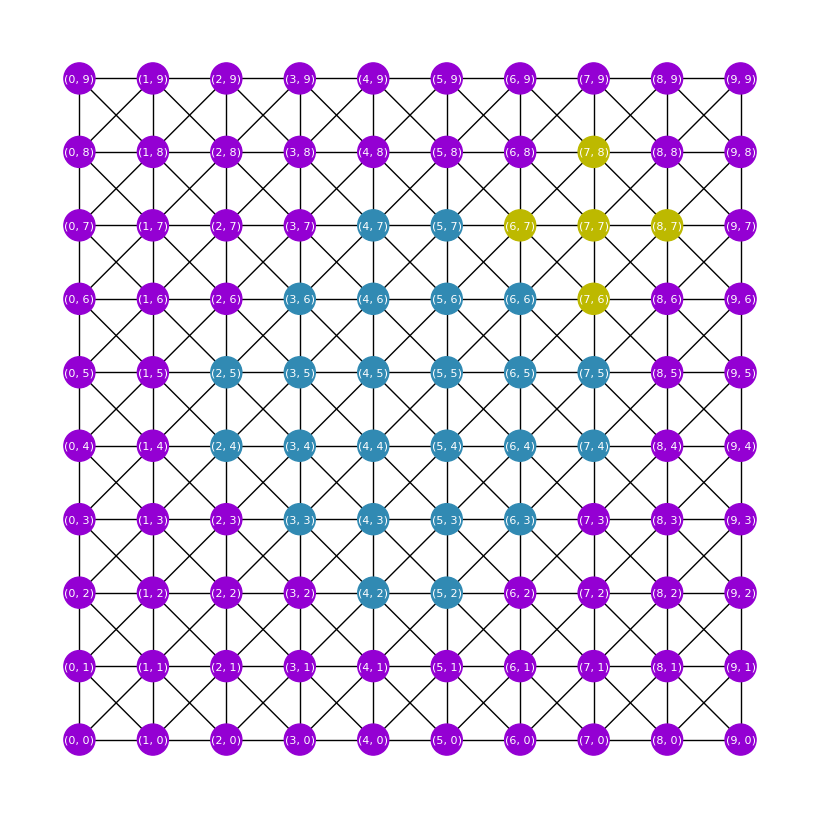

In [10]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges for a 10x10 grid, including diagonal connections
y = 10
x = 10
for i in range(x):
    for j in range(y):
        # Add node
        G.add_node((i, j))

        # Add edges to neighboring nodes (including diagonals)
        if i > 0:
            G.add_edge((i, j), (i - 1, j))  # Edge to the left
            if j > 0:
                G.add_edge((i, j), (i - 1, j - 1))  # Diagonal left-top
            if j < 9:
                G.add_edge((i, j), (i - 1, j + 1))  # Diagonal left-bottom
        if j > 0:
            G.add_edge((i, j), (i, j - 1))  # Edge to the top
        if i < 9:
            G.add_edge((i, j), (i + 1, j))  # Edge to the right
            if j > 0:
                G.add_edge((i, j), (i + 1, j - 1))  # Diagonal right-top
            if j < 9:
                G.add_edge((i, j), (i + 1, j + 1))  # Diagonal right-bottom
        if j < 9:
            G.add_edge((i, j), (i, j + 1))  # Edge to the bottom

# Define positions for the nodes in the graph
pos = {(i, j): (i, j) for i in range(10) for j in range(10)}

# Define nodes for Moon and Earth
moon_nodes = [(7,8), (6,7), (7,7), (8,7), (7,6)]
earth_nodes = [(5,7), (4,7), (3,6), (4,6), (5,6), (6,6), (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), 
               (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (3,3), (4,3), (5,3), (6,3), (4,2), (5,2)]

# Set colors for each node
node_colors = []
for node in G.nodes():
    if node in moon_nodes:
        node_colors.append('#bdb900')  # Color for Moon
    elif node in earth_nodes:
        node_colors.append('#318ab3')  # Color for Earth
    else:
        node_colors.append('#9400D3')  # Default color

# Plot the graph with diagonal connections
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', font_color='white', node_size=500, font_size=8)
plt.gca().set_facecolor('grey')
plt.show()


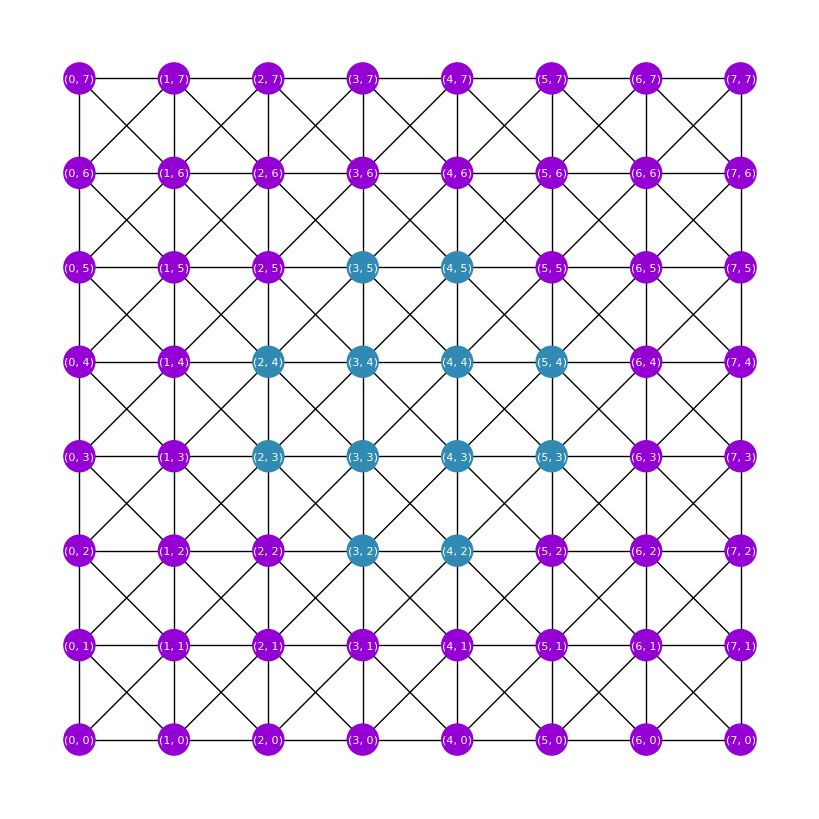

In [13]:
# Create a new graph
G2 = nx.Graph()

# Add nodes and edges for a 10x10 grid, including diagonal connections
y = 8
x = 8
for i in range(x):
    for j in range(y):
        # Add node
        G2.add_node((i, j))

        # Add edges to neighboring nodes (including diagonals)
        if i > 0:
            G2.add_edge((i, j), (i - 1, j))  # Edge to the left
            if j > 0:
                G2.add_edge((i, j), (i - 1, j - 1))  # Diagonal left-top
            if j < 7:
                G2.add_edge((i, j), (i - 1, j + 1))  # Diagonal left-bottom
        if j > 0:
            G2.add_edge((i, j), (i, j - 1))  # Edge to the top
        if i < 7:
            G2.add_edge((i, j), (i + 1, j))  # Edge to the right
            if j > 0:
                G2.add_edge((i, j), (i + 1, j - 1))  # Diagonal right-top
            if j < 7:
                G2.add_edge((i, j), (i + 1, j + 1))  # Diagonal right-bottom
        if j < 7:
            G2.add_edge((i, j), (i, j + 1))  # Edge to the bottom

# Define positions for the nodes in the graph
pos = {(i, j): (i, j) for i in range(8) for j in range(8)}

# Define nodes for Earth
earth_nodes = [ (3,5), (4,5), (3,4), (4,4), (5,4), (4,3), (5,3),(4,2),(3,2),(2,4),(2,3),(3,3)]

# Set colors for each node
node_colors = []
for node in G2.nodes():
    if node in earth_nodes:
        node_colors.append('#318ab3')  # Color for Earth
    else:
        node_colors.append('#9400D3')  # Default color

# Plot the graph with diagonal connections
plt.figure(figsize=(8, 8))
nx.draw(G2, pos, with_labels=True, node_color=node_colors, edge_color='black', font_color='white', node_size=500, font_size=8)
plt.gca().set_facecolor('grey')
plt.show()

In [14]:
config.media_embed = True
config.tex_compiler = "pdflatex"

In [23]:
class GraphScene(Scene):
    def construct(self):
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x*1.1, y*1.1, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#318ab3' if node in earth_nodes else 
                              '#68228B') for node in G2.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "color": node_colors[node]}
            for node in G2.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": "#666666"}
            for edge in G2.edges()
        }
        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G2.nodes), list(G2.edges), layout=pos_3d, layout_scale=2, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)
        m_graph.scale(0.7)  # Skaliert den Graphen auf die Hälfte seiner Größe

        # Zentriere den Graphen in der Szene
        m_graph.move_to(ORIGIN)
        
        # Füge den Graphen zur Szene hinzu
        self.add(m_graph)

        # Kreis
        circle = Circle(radius=1.4, color=RED)
        self.play(Create(circle))
        #self.play(Create(m_graph))
        self.wait(2)

In [24]:
%manim -pql GraphScene

[01/25/24 22:42:49] INFO     Animation 0 : Partial movie file written in                   ]8;id=467278;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=429398;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\GraphScene\1185818338_20929                         
                             02628_319086530.mp4'                                                                  

[01/25/24 22:42:50] INFO     Animation 1 : Partial movie file written in                   ]8;id=506609;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=298812;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\GraphScene\624642324_784179                         
                             552_137774353.mp4'                                                                    

                    INFO     Combining to Movie file.                                      ]8;id=474630;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=103175;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=264919;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=535968;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at 'C:\Users\a829727\OneDrive -                                            
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\GraphScene.mp4'                                                         
                                                                                                                   

                    INFO     Rendered GraphScene                                                       ]8;id=878972;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=989648;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

[01/25/24 22:42:51] INFO     Previewed File at: 'C:\Users\a829727\OneDrive -                        ]8;id=43585;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=777419;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos\Lukas\48                
                             0p15\GraphScene.mp4'                                                                  

In [41]:


class RedCircle(Scene):
    def construct(self):
        circle = Circle(color=RED)
        self.play(Create(circle))
        self.wait(2)

%manim -pql RedCircle


                    INFO     Animation 0 : Using cached data (hash :                           ]8;id=739047;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=322258;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             1185818338_731606283_223132457)                                                       

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=38793;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=80827;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             624642324_784179552_2702107384)                                                       

                    INFO     Combining to Movie file.                                      ]8;id=555463;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=391023;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=216610;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=737106;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at 'C:\Users\a829727\OneDrive -                                            
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\RedCircle.mp4'                                                          
                                                                                                                   

                    INFO     Rendered RedCircle                                                        ]8;id=866766;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=968374;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

[01/25/24 22:23:41] INFO     Previewed File at: 'C:\Users\a829727\OneDrive -                        ]8;id=134348;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=87415;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos\Lukas\48                
                             0p15\RedCircle.mp4'                                                                   

In [32]:
from manim import *

class MinCutScene(Scene):
    def construct(self):
        # Define the positions of the vertices for both graphs
        positions = {
            0: LEFT,
            1: UP * 2,
            2: RIGHT * 2,
            3: DOWN * 2,
            4: LEFT * 2 + DOWN * 2,
            5: RIGHT * 2 + DOWN * 2,  # Additional vertex for the second graph
        }

        # Define the edges for both graphs
        edges = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (4, 3)]
        edges_2 = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (4, 3), (2, 5), (5, 0)]

        # Create two Graph objects
        graph_1 = Graph(list(positions.keys())[:-1], edges, layout=positions, labels=False).set_color(BLUE)
        graph_2 = Graph(list(positions.keys()), edges_2, layout=positions, labels=False).set_color(ORANGE)

        # Create a connecting edge between two nodes from different graphs
        connecting_edge = Line(graph_1[2].get_center(), graph_2[0].get_center()).set_color(WHITE)
        # Add the graphs and the connecting edge to the scene
        self.add(graph_1, graph_2, connecting_edge)

        # Highlight the min-cuts in the graphs
        min_cut_1 = graph_1.edges[(0, 4)]
        min_cut_1.set_color(RED)

        min_cut_2 = graph_2.edges[(2, 5)]
        min_cut_2.set_color(RED)

        # Highlight the desired cut
        desired_cut = graph_1.edges[(2, 3)]
        desired_cut.set_color(GREEN)

        # Add the graphs to the scene
        self.add(graph_1, graph_2)

        # Shift the second graph to separate it from the first
        graph_2.shift(RIGHT * 4)

        # Show the changes on screen
        self.play(Create(graph_1), Create(graph_2),Create(connecting_edge))
        self.wait(1)

# To run this code, make sure you have Manim installed and use the command `manim -pql <scriptname>.py MinCutScene` in the command line.


In [33]:
%manim -pql MinCutScene


[01/25/24 19:29:59] INFO     Animation 0 : Partial movie file written in                   ]8;id=712616;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=976980;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\MinCutScene\1185818338_1476                         
                             300876_1460601956.mp4'                                                                

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=643972;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=364319;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\MinCutScene\624642324_29193                         
                             40033_3072702887.mp4'                                                                 

                    INFO     Combining to Movie file.                                      ]8;id=523958;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=949419;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=59534;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=999321;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at 'C:\Users\a829727\OneDrive -                                            
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\MinCutScene.mp4'                                                        
                                                                                                                   

                    INFO     Rendered MinCutScene                                                      ]8;id=599515;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=233826;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

[01/25/24 19:30:00] INFO     Previewed File at: 'C:\Users\a829727\OneDrive -                        ]8;id=791596;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=492664;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos\Lukas\48                
                             0p15\MinCutScene.mp4'                                                                 